In [8]:
from urllib import robotparser
robot = robotparser.RobotFileParser()
robot.set_url("https://www.github.com/robots.txt")
robot.read()
robot.can_fetch("*", "/search/about")

False

In [9]:
from urllib import request

resp = request.urlopen("http://www.google.com")
resp.geturl() #내가 요청한 객체가 잘 들어있는지 reponse 헤더에서 찾아서 뿌려줌
resp.reason #혹시 못 받았을 경우 왜 못받았는지 message
resp.getcode() #200이 나와야 잘 된 것
print(resp.info())

resp.getheaders()

Date: Thu, 11 Jul 2019 02:08:45 GMT
Expires: -1
Cache-Control: private, max-age=0
Content-Type: text/html; charset=ISO-8859-1
P3P: CP="This is not a P3P policy! See g.co/p3phelp for more info."
Server: gws
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Set-Cookie: 1P_JAR=2019-07-11-02; expires=Sat, 10-Aug-2019 02:08:45 GMT; path=/; domain=.google.com
Set-Cookie: NID=187=k8IGsqVNrA3ZMzdyi35k1KKi74hizi7v70FTxb3hf1ogD_Z4AYwipsfioH-FK3TDf-3SWWu575YJ5zcjwjjmY1C_WA-mDRLnVnJOOvNzBd3p8LmepngUJzKEB26baVC_QXzZNNQBWdsk76oRtKebvd6jHKeSawcYX3oKeusT5Xk; expires=Fri, 10-Jan-2020 02:08:45 GMT; path=/; domain=.google.com; HttpOnly
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




[('Date', 'Thu, 11 Jul 2019 02:08:45 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-07-11-02; expires=Sat, 10-Aug-2019 02:08:45 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=187=k8IGsqVNrA3ZMzdyi35k1KKi74hizi7v70FTxb3hf1ogD_Z4AYwipsfioH-FK3TDf-3SWWu575YJ5zcjwjjmY1C_WA-mDRLnVnJOOvNzBd3p8LmepngUJzKEB26baVC_QXzZNNQBWdsk76oRtKebvd6jHKeSawcYX3oKeusT5Xk; expires=Fri, 10-Jan-2020 02:08:45 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

In [11]:
print(resp.status)
print(resp.reason)
resp.info()

200
OK


In [ ]:
https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81 # 여기까지만 해도 결과 잘 나옴
    source=hp
    ei=85smXY2AOIGq8QWChp6IDQ
    q=%EB%B0%95%EB%B3%B4%EC%98%81
    oq=%EB%B0%95%EB%B3%B4%EC%98%81
    gs_l=psy-ab.3..0l10.214815.238550..238695...9.0..0.678.2070.8j6j5-1......0....1..gws-wiz.....10..35i39j0i131.FJkAypLP9JE

In [12]:
resp = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
resp.code, resp.reason
# 오류가 나면 정상

HTTPError: HTTP Error 403: Forbidden

In [13]:
# 403 Forbidden : 권한이 없을 때 1) 진짜로 접근권한이 없을 때 2) 내가 요청을 잘못해서
# 왜 접근권한이 없을까?
# robots.txt에서 search는 불허
# 어떻게 에러를 핸들링할까?
# 헤더를 어떻게 씹을까?

In [15]:
from urllib import error
try:
    req = request.urlopen("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81")
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)

In [21]:
headers = {"user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
from urllib import error
try:
    req = req = request.Request("https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81", 
                          headers = headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
#이대로 실행하면 오류가 나지 않았기 때문에 아무 응답 없음

In [17]:
resp.code, resp.reason

(200, 'OK')

In [18]:
req.headers #서버쪽으로 전달한 헤더 useragent값만 헤더를 강제로 심어서 보내준 것 서버입장에서는 봇이 아니고 사람이기 때문에 막을 이유가 없음

{'User-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36'}

In [19]:
headers = {"user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
try:
    req = req = request.Request("https://www.google.com/search?q=박보영", 
                          headers = headers)
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
# 한글은 바이트가 아니기 때문에 UnicodeEncodeError

UnicodeEncodeError: 'ascii' codec can't encode characters in position 14-16: ordinal not in range(128)

In [ ]:
# urlparse : url을 break해줌 <-여러 페이지를 긁어 올거고 그러려면 outbound link가 하나 있어야 하고 innerbound link가 하나 있어야 함
# 호스트는 안 바뀌는데 서비스하는 이름은 바뀌어야 함
# 검색결과 페이지에서 링크를 타고 돌아다닐 건데 그때마다 주소를 바꿔줘야 함 운이 좋으면 외부 링크일 수도 있음 -> url 주소만 바꿔주면 됨
# 그런데 상대주소일 때는 urljoin을 써야 함
headers = {"user-agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"}
param = {} #여기에 필요한 파라미터 다 세팅한 다음에 나중에 encode 한 번만 돌리면 됨
try:
    req = request.Request("https://www.google.com/search?q=박보영", #물음표 뒤에 다 없애고 
                          headers = headers)
    
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code, e.reason, e.headers)
# 한글은 바이트가 아니기 때문에 UnicodeEncodeError

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>\xeb\xb0\x95\xeb\xb3\xb4\xec\x98\x81 - Google \xea\xb2\x80\xec\x83\x89</title><script nonce="uhq5BKPDhKQIn73j41j18A==">(function(){window.google={kEI:\'PLcmXYGYEtC4mAX4ubCoBA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_PLcmXYGYEtC4mAX4ubCoBA\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=goo
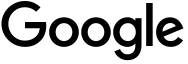

In [22]:
resp.read() # 실제 이용하려면 string으로 decode해줘야 함

In [23]:
resp.read().decode('utf-8') # 한글 안 나옴 그러니까 헤더 보고 캐릭터셋 보고 디코드 따로 해야 함

''

request package
메소드에 따라 CRUV 방식 있는 게 .get... 등 다 있음
request.response가 제일 중요 (데이터를 받아야 하니까)
http://httpbin.org/
http://httpbin.org/get?key=value 에 대한 응답은 json으로 날라옴


In [24]:
import requests

In [27]:
resp = requests.request("get",
                "http://httpbin.org/get",
                params = {"key" : "value"})

In [28]:
print(resp.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.134, 163.152.3.134", 
  "url": "https://httpbin.org/get?key=value"
}



urllib보다 훨씬 간편
앞에서는 한 번 읽으면 날라가는데 지금은 여러 번 읽어도 됨 안 날라가고 그대로 있음

In [31]:
resp = requests.request("post",
                "http://httpbin.org/post",
                data = {"key" : "value"})

In [32]:
print(resp.text) #argument, data, files, form : body 부분 일반적으로 회원가입이나 로그인을 하면 그 값이 form에 쭉 붙어서 나감
# 그래서 앞에 시큐어웹 등이 아이디나 패스워드를 노출시키지 않도록 붙어서 날라감

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "9", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "163.152.3.134, 163.152.3.134", 
  "url": "https://httpbin.org/post"
}



In [33]:
resp = requests.request("post",
                "http://httpbin.org/get",
                data = {"key" : "value"})

In [34]:
print(resp.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>405 Method Not Allowed</title>
<h1>Method Not Allowed</h1>
<p>The method is not allowed for the requested URL.</p>



In [72]:
import requests
import time

# request package를 사용하여 error handling
def download(method, url, param=None, data=None, timeout=1, maxretries=3):
    try:
        resp = requests.request(method, url, params=param, data=data, headers=headers)
        # 한글처럼 아스키가 아닌 문자들을 변환시킬 때 서비스키도 같이 바꿔버림
        resp.raise_for_status()
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries > 0:
            print(e.response.status_code)
            print(e.response.reason)
            time.sleep(timeout) # 1초 정도 기다림
            print(maxretries)
            print("재시도") #maxretries
            download(method, url, param, data, timeout, maxretries-1)
        else:
            print(e.response.status_code)
            print(e.response.reason)
    return resp

In [47]:
download("get", "http://www.google.com")

<Response [200]>

In [73]:
headers=None
html = download("get", "https://www.crawler-test.com/status_codes/status_500")

500
Internal Server Error
3
재시도
500
Internal Server Error
2
재시도
500
Internal Server Error
1
재시도
500
Internal Server Error


500 에러일 때 서버가 사용량이 일시적으로 많은 건지 아니면 일시적으로 코드 수정 하느라 막아놓은 건지 확인하기 위해 좀 있다 시도

In [58]:
html.text

'JlNpdUtbAMk9NQmep6sv'

https://www.crawler-test.com/status_codes/status_403 # status code에 따라서 응답 메시지를 보내줌

In [78]:
html = download("get",
               "http://httpbin.org/get",
               {"key":"value"})
print(html.text)

{
  "args": {
    "key": "value"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "origin": "163.152.3.134, 163.152.3.134", 
  "url": "https://httpbin.org/get?key=value"
}



In [80]:
import json

obj = json.loads(html.text)

In [81]:
obj.keys()

dict_keys(['args', 'headers', 'origin', 'url'])

In [89]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
params = {
    "serviceKey" : "NbR2M9y%2BsYRC2iVB3VToK91EOdm02aeBqTiE%2Fa2E48sNa1LiJqY%2BraDyNd2dz3%2F%2FLkD0I1P%2FdRKbC4ekxjGcug%3D%3D",
    "numOfRows" : 10,
    "pageSize" : 10,
    "pageNo" : 1,
    "startPage" : 1,
    "stationName" : "성북구",
    "dataTerm" : "DAILY",
    "ver" : "1.3",
    "_returnType" : "JSON"
}
params["serviceKey"] = requests.compat.unquote(params["serviceKey"]) # 오늘 request package를 이용한 unquote
#params["serviceKey"] = urllib.parse.unquote(params["serviceKey"]) # 어제 unquote (역변환 먼저 해줌)
print(params)
html = download("get", url, params)
print(html.text)

{'serviceKey': 'NbR2M9y+sYRC2iVB3VToK91EOdm02aeBqTiE/a2E48sNa1LiJqY+raDyNd2dz3//LkD0I1P/dRKbC4ekxjGcug==', 'numOfRows': 10, 'pageSize': 10, 'pageNo': 1, 'startPage': 1, 'stationName': '성북구', 'dataTerm': 'DAILY', 'ver': '1.3', '_returnType': 'JSON'}
{"list":[{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-11 14:00","khaiGrade":"1","khaiValue":"37","mangName":"도시대기","no2Grade":"1","no2Value":"0.020","numOfRows":"10","o3Grade":"1","o3Value":"0.022","pageNo":"1","pm10Grade":"1","pm10Grade1h":"1","pm10Value":"8","pm10Value24":"8","pm25Grade":"1","pm25Grade1h":"1","pm25Value":"5","pm25Value24":"4","resultCode":"","resultMsg":"","rnum":0,"serviceKey":"","sidoName":"","so2Grade":"","so2Value":"-","stationCode":"","stationName":"","totalCount":"","ver":""},{"_returnType":"json","coGrade":"1","coValue":"0.5","dataTerm":"","dataTime":"2019-07-11 13:00","khaiGrade":"1","khaiValue":"40","mangName":"도시대기","no2Grade":"1","no2Value":"0.014","numOfRows":"10","o3Gra

In [84]:
html.url #서비스키가 다시한번더 encode되는 바람에 잘못된 서비스키가 날아감...api 쓸 때 흔하게 발생하는 문제

'http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?serviceKey=NbR2M9y%252BsYRC2iVB3VToK91EOdm02aeBqTiE%252Fa2E48sNa1LiJqY%252BraDyNd2dz3%252F%252FLkD0I1P%252FdRKbC4ekxjGcug%253D%253D&numOfRows=10&pageSize=10&pageNo=1&startPage=1&stationName=%EC%84%B1%EB%B6%81%EA%B5%AC&dataTerm=DAILY&ver=1.3&_returnType=JSON'

In [90]:
obj = json.loads(html.text)

In [91]:
obj

{'list': [{'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.5',
   'dataTerm': '',
   'dataTime': '2019-07-11 14:00',
   'khaiGrade': '1',
   'khaiValue': '37',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.020',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.022',
   'pageNo': '1',
   'pm10Grade': '1',
   'pm10Grade1h': '1',
   'pm10Value': '8',
   'pm10Value24': '8',
   'pm25Grade': '1',
   'pm25Grade1h': '1',
   'pm25Value': '5',
   'pm25Value24': '4',
   'resultCode': '',
   'resultMsg': '',
   'rnum': 0,
   'serviceKey': '',
   'sidoName': '',
   'so2Grade': '',
   'so2Value': '-',
   'stationCode': '',
   'stationName': '',
   'totalCount': '',
   'ver': ''},
  {'_returnType': 'json',
   'coGrade': '1',
   'coValue': '0.5',
   'dataTerm': '',
   'dataTime': '2019-07-11 13:00',
   'khaiGrade': '1',
   'khaiValue': '40',
   'mangName': '도시대기',
   'no2Grade': '1',
   'no2Value': '0.014',
   'numOfRows': '10',
   'o3Grade': '1',
   'o3Value': '0.02

In [98]:
url = "http://search.naver.com/search.naver"
params = {
    "sm" : "top_hty",
    "fbm" : 1,
    "ie" : "utf8",
    "query" : "박보영"
}
print(params)
html = download("get", url, params)
print(html.text)
#response로 받으면 객체 .text 또는 .content로 내용 받아와야 함

{'sm': 'top_hty', 'fbm': 1, 'ie': 'utf8', 'query': '박보영'}
<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="박보영 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'박보영'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'박보영'의 네이버 통합검색 결과입니다."> <title>박보영 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711

In [119]:
url = "http://www.kyobobook.co.kr/search/SearchCommonMain.jsp"
#post에서는 form에 담아서 넘김
data = {
    "vPstrCategory" : "TOT",
    "vPstrKeyWord" : "may",
    "vPplace" : "top"
}
html = download("post", url, data=data)
print(html.text)
# 안 좋은 사례
# euc-kr로 encoding됨

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
















<!-- header -->
 



























<head>
	<title>may -  인터넷교보문고</title>
<META http-equiv="Pragma" content="nocache">
<meta http-equiv="Expires" content="0"/>
<META http-equiv="Cache-Control" content="no-cache">
<META http-equiv='Content-Type' content='text/html; charset=euc-kr'>
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1">
<!--<LINK href="/common/Style.css" rel="stylesheet" type="text/css"/>-->
<link rel="shortcut icon" href="/newimages/apps/b2c/kyobo.ICO"/>
<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/default_ink.css" />
<link rel="stylesheet" type="text/css" href="http://image.kyobobook.co.kr/ink/css/search.css" />
<!--
<link rel="stylesheet" type="text/css" href="/css/common.css"/>
<link rel="stylesheet" type="text/css" href="/css/ink_sear

In [101]:
from html import unescape

In [150]:
url = "http://pythonscraping.com/pages/cookies/login.html"
url = requests.compat.urljoin(url, "welcome.php")
data = {
    "username" : "1234",
    "password" : "password"
}

html = download("post", url, data = data)
html.text

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [151]:
session = requests.Session()

In [152]:
# 이때부터 세션과 쿠키를 관리해줌
session.post(url, data) # 얘를 써서 동일하게 접근하면 들고 있는채로 이동할 수 있음
html.text #쿠키 등록해줌

'\n<h2>Welcome to the Website!</h2>\nWhoops! You logged in wrong. Try again with any username, and the password "password"<br><a href="login.html">Log in here</a>'

In [153]:
html = session.post(url) #data를 안 써도 로그인 가능
#대형 포털 사이트에서는 안 됨
#소규모 사이트는 됨
html.text

'\n<h2>Welcome to the Website!</h2>\nYou have logged in successfully! <br><a href="profile.php">Check out your profile!</a>'

In [154]:
#로그인이 되기만 하면 그 뒷단의 정보를 얘가 로그인 없이 싹 다 끌어올 수 있음

In [158]:
html = session.get("https://everytime.kr/393758")
html.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n  <title>에브리타임</title>\n  <meta charset="utf-8">\n  <meta name="referrer" content="origin">\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\n  <meta property="fb:app_id" content="258676027581965">\n  <meta property="og:type" content="website">\n  <meta property="og:image" content="https://everytime.kr/images/og_image.png">\n  <meta property="og:url" content="https://everytime.kr/393758">\n  <meta property="og:site_name" content="에브리타임">\n  <meta property="og:title" content="에브리타임">\n  <meta property="og:description" content="전국 400개 대학을 지원하는 대학교 커뮤니티 및 시간표 서비스. 시간표 작성 및 학업 관리, 학교 생활 정보, 학교별 익명 커뮤니티 기능을 제공합니다.">\n  <meta name="description" content="전국 400개 대학을 지원하는 대학교 커뮤니티 및 시간표 서비스. 시간표 작성 및 학업 관리, 학교 생활 정보, 학교별 익명 커뮤니티 기능을 제공합니다.">\n  <meta name="keywords" content="에브리타임, 에타, everytime, 시간표, 수강신청, 강의평가, 학점계산기, 학식, 오늘의학식, 책방, 중고책, 대학생, 대학교, 대학, 대학생 시간표, 대학교 시간표, 대학생 커뮤니티, 대학교 커뮤니티, 시간표 앱, 시간표 어플">\n  <meta name="naver-site-verificat

우리의 목적은 링크를 가져오는 것
우클릭해서 페이지 소스 보기 한 결과와 개발자 도구에서 elements에서 받아오는 결과는 다름
link와 글까지 검색결과 나오도록

In [ ]:
result = re.findall(r'\B<div class="r"><a href="(.+?)" .+?>\B<h3 .+?>(.+?)</h3>', unescape(html.text))
len(result), [{"title":row[1], "url":row[0]} for row in result]